In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = od.download(
    "https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mominulislamayan
Your Kaggle Key: ··········


100%|██████████| 24.0M/24.0M [00:00<00:00, 149MB/s] 

In [ ]:
train_df = pd.read_csv('/content/predictive-analytics-for-customer-churn-dataset/train.csv')

In [ ]:
train_df.shape


(243787, 21)

In [ ]:
train_df.shape

(243787, 21)

In [ ]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [ ]:
train_df.shape

(243787, 21)

In [ ]:
for column in train_df.columns:
  print(column)

AccountAge
MonthlyCharges
TotalCharges
SubscriptionType
PaymentMethod
PaperlessBilling
ContentType
MultiDeviceAccess
DeviceRegistered
ViewingHoursPerWeek
AverageViewingDuration
ContentDownloadsPerMonth
GenrePreference
UserRating
SupportTicketsPerMonth
Gender
WatchlistSize
ParentalControl
SubtitlesEnabled
CustomerID
Churn


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [ ]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [ ]:
train_df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [ ]:
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [ ]:
column_ranges = {}
for column in train_df.columns:
    if train_df[column].dtype in [int, float]:
        column_min = train_df[column].min()
        column_max = train_df[column].max()
        column_ranges[column] = (column_min, column_max)

print("Minimum and Maximum Range for each column:")
for column, (min_value, max_value) in column_ranges.items():
    print(f"{column}: Min = {min_value}, Max = {max_value}")

Minimum and Maximum Range for each column:
AccountAge: Min = 1, Max = 119
MonthlyCharges: Min = 4.990061546582933, Max = 19.989956867323198
TotalCharges: Min = 4.991154354368685, Max = 2378.723844106135
ViewingHoursPerWeek: Min = 1.000065389097874, Max = 39.99972313614872
AverageViewingDuration: Min = 5.0005474861951456, Max = 179.99927511771548
ContentDownloadsPerMonth: Min = 0, Max = 49
UserRating: Min = 1.0000073778257992, Max = 4.999989412151973
SupportTicketsPerMonth: Min = 0, Max = 9
WatchlistSize: Min = 0, Max = 24
Churn: Min = 0, Max = 1


In [ ]:
object_columns = train_df.select_dtypes(include=['object'])

# List the columns with 'object' data type
object_column_names = object_columns.columns.tolist()
print(object_column_names)

['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']


In [ ]:
object_type_df = train_df[['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']]

In [ ]:
object_type_df.sample(5)

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled
234540,Premium,Mailed check,No,Both,Yes,TV,Sci-Fi,Male,Yes,No
206305,Premium,Bank transfer,No,Movies,No,Mobile,Sci-Fi,Male,Yes,No
130858,Premium,Mailed check,Yes,Both,Yes,Mobile,Action,Male,No,Yes
65853,Basic,Credit card,No,Movies,No,Tablet,Comedy,Male,Yes,Yes
109097,Basic,Credit card,Yes,Movies,Yes,Tablet,Drama,Female,Yes,Yes


In [ ]:
train_df.corr()

<ipython-input-20-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
AccountAge,1.000000,0.001706,0.820144,-0.001640,0.000191,0.001220,0.000440,-0.002055,-0.002640,-0.197736
MonthlyCharges,0.001706,1.000000,0.498207,-0.003029,-0.000604,-0.000127,0.000056,0.000071,-0.000540,0.100473
TotalCharges,0.820144,0.498207,1.000000,-0.003006,0.000860,0.000208,0.000609,-0.001770,-0.001770,-0.120529
ViewingHoursPerWeek,-0.001640,-0.003029,-0.003006,1.000000,0.000949,0.002149,-0.003185,0.000788,-0.000750,-0.128645
AverageViewingDuration,0.000191,-0.000604,0.000860,0.000949,1.000000,-0.002397,-0.000406,-0.000158,0.000749,-0.146897
ContentDownloadsPerMonth,0.001220,-0.000127,0.000208,0.002149,-0.002397,1.000000,0.001294,-0.000497,0.002324,-0.129752
UserRating,0.000440,0.000056,0.000609,-0.003185,-0.000406,0.001294,1.000000,-0.000142,0.002567,0.022124
SupportTicketsPerMonth,-0.002055,0.000071,-0.001770,0.000788,-0.000158,-0.000497,-0.000142,1.000000,0.001250,0.084064
WatchlistSize,-0.002640,-0.000540,-0.001770,-0.000750,0.000749,0.002324,0.002567,0.001250,1.000000,0.021739
Churn,-0.197736,0.100473,-0.120529,-0.128645,-0.146897,-0.129752,0.022124,0.084064,0.021739,1.000000


In [ ]:
train_df[['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']] = train_df[['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']].apply(LabelEncoder().fit_transform)

In [ ]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,1,3,0,0,0,1,36.758104,...,10,4,2.176498,4,1,3,0,0,CB6SXPNVZA,0
1,57,5.175208,294.986882,0,1,1,1,0,3,32.450568,...,18,0,3.478632,8,1,23,0,1,S7R2G87O09,0
2,73,12.106657,883.785952,0,3,1,1,0,0,7.395160,...,23,3,4.238824,6,1,1,1,1,EASDC20BDT,0
3,32,7.263743,232.439774,0,2,0,2,0,3,27.960389,...,30,2,4.276013,2,1,24,1,1,NPF69NT69N,0
4,57,16.953078,966.325422,1,2,1,2,0,2,20.083397,...,20,1,3.616170,4,0,0,0,0,4LGYPK7VOL,0


In [ ]:
train_df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
train_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'Churn'],
      dtype='object')

In [ ]:
unique_values = {}
for column in train_df.columns:
    unique_values[column] = train_df[column].unique()

print("All possible values for each column:")
for column, values in unique_values.items():
    print(f"{column}: {values}")

All possible values for each column:
AccountAge: [ 20  57  73  32 113  38  25  26  14 114   3  64  43  98  47  11  50   5
  63  55  84  16  80 116  33  86  52  77   4  91 119  72  94  99  40  60
 105  54  34  67  49 100   6  97  24  53  82  18   8  29   9 101  30  74
  17  69  61  65  96  62  35  51 109  76   2  42 111  68  15  27  58 103
  45  36  85 107 115  81 106  70  46  83  92   1  44 118  23  88   7  31
  71  48  93 117  95  37 112  21 108  19  12  78 104  87  90 110  56  79
  41  13  28  10  59  39  75 102  89  66  22]
MonthlyCharges: [11.0552151   5.17520846 12.10665687 ... 14.51456873 18.14055532
 11.59377449]
TotalCharges: [ 221.10430197  294.98688225  883.78595161 ... 1640.14626689  126.98388725
 1043.4397042 ]
SubscriptionType: [1 0 2]
PaymentMethod: [3 1 2 0]
PaperlessBilling: [0 1]
ContentType: [0 1 2]
MultiDeviceAccess: [0 1]
DeviceRegistered: [1 3 0 2]
ViewingHoursPerWeek: [36.75810391 32.45056783  7.39516011 ... 10.62872846 30.46678245
 24.97253673]
AverageViewingDura

In [ ]:
train_df.shape

(243787, 20)

In [ ]:
no_of_col = 20
no_of_row = 20

In [ ]:
train_df['Churn'].value_counts()

0    199605
1     44182
Name: Churn, dtype: int64

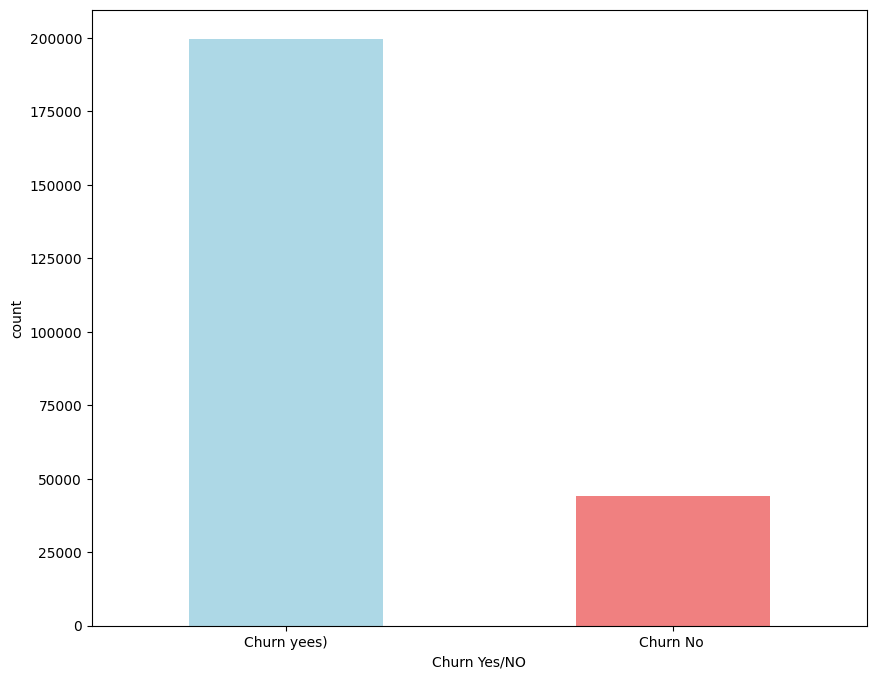

In [ ]:
class_counts=train_df['Churn'].value_counts()
plt.figure(figsize = (10,8))
class_counts.plot(kind = "bar", color = ["lightblue", "lightcoral"])
plt.xlabel("Churn Yes/NO")
plt.xticks([0,1], labels=["Churn yees)", "Churn No "],rotation = 0)
plt.ylabel("count")
plt.show()

In [ ]:
X = train_df[[
    'AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled'
]]
Y = train_df['Churn']
X[['PaymentMethod']]

,PaymentMethod
0,3
1,1
2,3
3,2
4,2
...,...
243782,3
243783,1
243784,1
243785,0


In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
train_df[['SubscriptionType']].value_counts()

SubscriptionType
2                   81920
0                   81050
1                   80817
dtype: int64

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.16913147, -0.33170285, -1.01254992, ..., -1.25378612,
        -1.00157228, -1.00235318],
       [-0.08994461, -1.69042309, -0.87130254, ...,  1.52668738,
        -1.00157228,  0.99765234],
       [ 0.37673079, -0.08874135,  0.25435291, ..., -1.53183347,
         0.99843019,  0.99765234],
       ...,
       [ 1.54341928,  0.46766595,  1.70034892, ...,  0.13645063,
         0.99843019,  0.99765234],
       [-1.54830522,  1.30553939, -1.19248763, ..., -0.97573877,
        -1.00157228,  0.99765234],
       [ 0.87257339, -0.20725544,  0.55957607, ..., -1.53183347,
         0.99843019, -1.00235318]])

In [ ]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, Y)

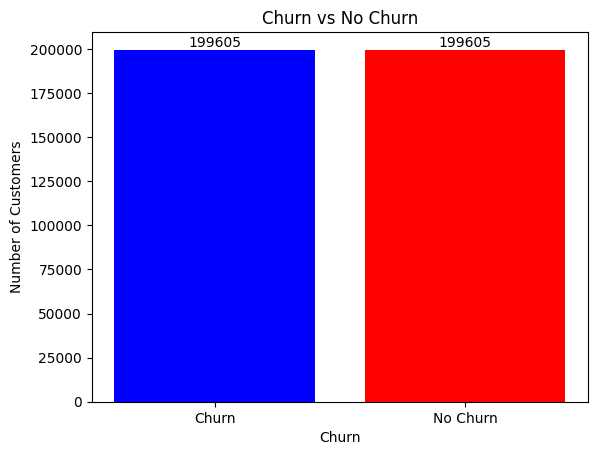

In [ ]:
Curn_count = y_resampled.value_counts()

# Create a bar plot
plt.bar(Curn_count.index, Curn_count.values, color=['blue', 'red'])
plt.xticks(Curn_count.index, labels=['Churn', 'No Churn'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Churn vs No Churn')

# Add count labels above the bars
for i, count in enumerate(Curn_count.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
y_resampled.shape

(399210,)

In [ ]:
X_resampled.shape

(399210, 19)

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     40050
           1       0.69      0.70      0.70     39792

    accuracy                           0.70     79842
   macro avg       0.70      0.70      0.70     79842
weighted avg       0.70      0.70      0.70     79842

ROC_AUC_SCORE is 0.6958382992309071


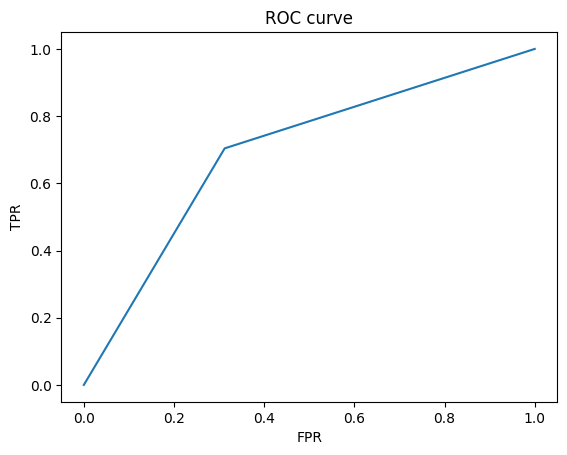

Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.70      0.68      0.69     40050
           1       0.69      0.71      0.70     39792

    accuracy                           0.70     79842
   macro avg       0.70      0.70      0.70     79842
weighted avg       0.70      0.70      0.70     79842

ROC_AUC_SCORE is 0.6958734671226707


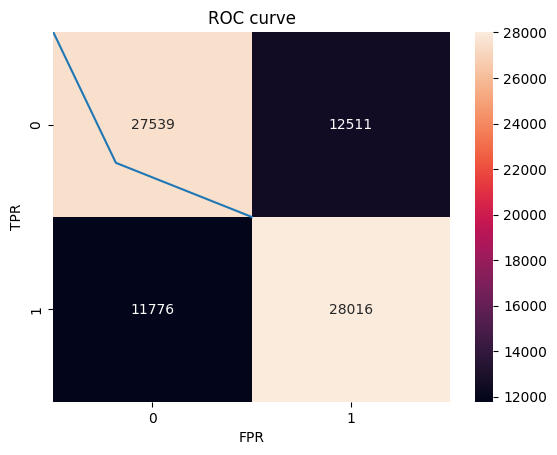

Classification Report: Decision Trees
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     40050
           1       0.79      0.81      0.80     39792

    accuracy                           0.80     79842
   macro avg       0.80      0.80      0.80     79842
weighted avg       0.80      0.80      0.80     79842

ROC_AUC_SCORE is 0.7952395113767622


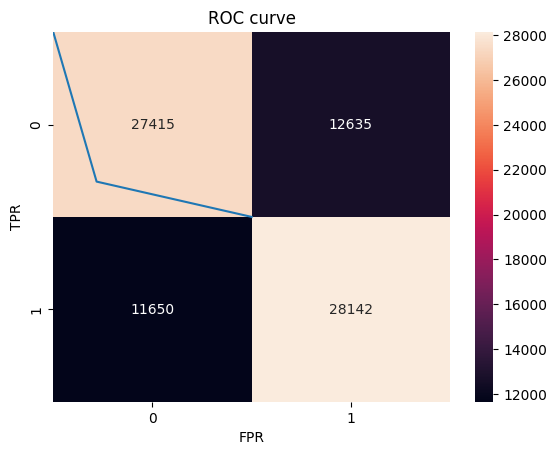

Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     40050
           1       0.91      0.87      0.89     39792

    accuracy                           0.89     79842
   macro avg       0.89      0.89      0.89     79842
weighted avg       0.89      0.89      0.89     79842

ROC_AUC_SCORE is 0.8926553640729548


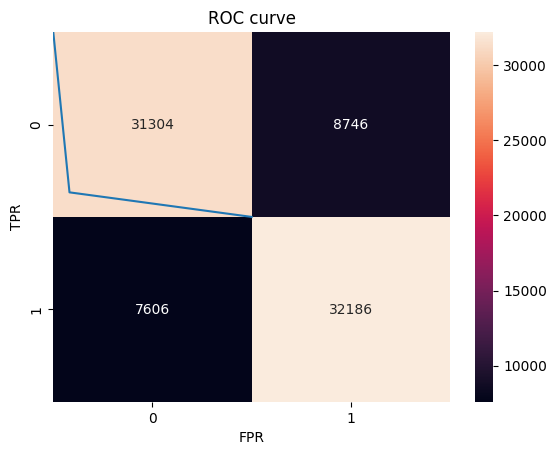

Classification Report: Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.71      0.67      0.69     40050
           1       0.68      0.72      0.70     39792

    accuracy                           0.69     79842
   macro avg       0.69      0.69      0.69     79842
weighted avg       0.69      0.69      0.69     79842

ROC_AUC_SCORE is 0.6937644383754324


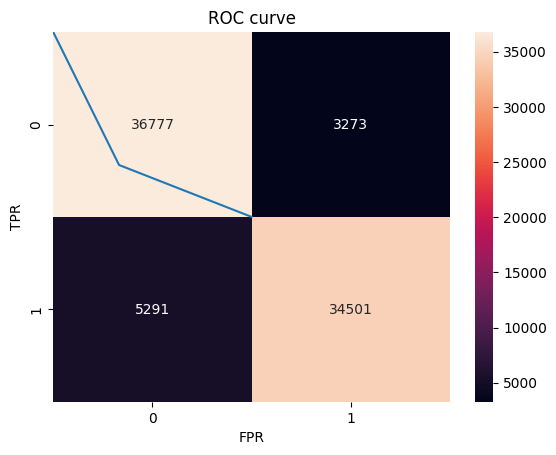

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     40050
           1       0.97      0.80      0.88     39792

    accuracy                           0.89     79842
   macro avg       0.90      0.89      0.89     79842
weighted avg       0.90      0.89      0.89     79842

ROC_AUC_SCORE is 0.8891072641405723


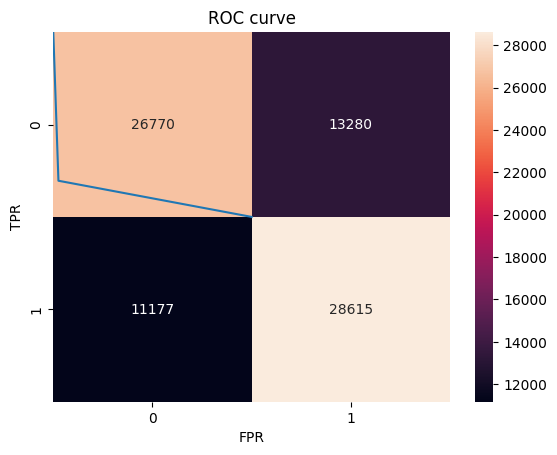

Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.96      0.61      0.75     40050
           1       0.71      0.97      0.82     39792

    accuracy                           0.79     79842
   macro avg       0.84      0.79      0.79     79842
weighted avg       0.84      0.79      0.79     79842

ROC_AUC_SCORE is 0.7933925683215642


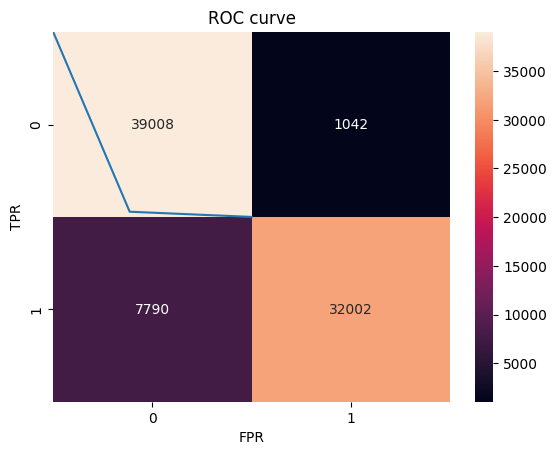

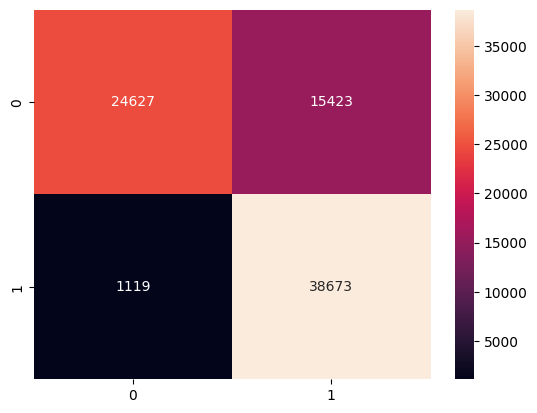

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Create a dictionary to store models
models = {}

models['Logistic Regression'] = LogisticRegression()
models['Support Vector Machines'] =  LinearSVC()
models['Decision Trees'] =  DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()
models['XGBoost'] = XGBClassifier()
models['K-Nearest Neighbors'] = KNeighborsClassifier()





accuracy, precision, recall = {}, {}, {}

for key in models.keys():


    models[key].fit(X_train, Y_train)
    predictions = models[key].predict(X_test)


    accuracy[key] = accuracy_score(predictions, Y_test)
    precision[key] = precision_score(predictions, Y_test)
    recall[key] = recall_score(predictions, Y_test)

    Y_predict = models[key].predict(X_test)
    auc = roc_auc_score(Y_test, Y_predict)

    print('Classification Report:',key)
    print(classification_report(Y_test,predictions))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
    print('ROC_AUC_SCORE is',roc_auc_score(Y_test, predictions))



    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')

    plt.show()
    sns.heatmap(confusion_matrix(Y_test,predictions),fmt='',annot=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def weighted_average_model(models, weights, X_test):
    # Initialize empty arrays for predictions
    weighted_predictions = []

    for key in models.keys():
        model = models[key]
        weight = weights.get(key, 1.0)  # Default weight is 1.0 if not provided

        # Make predictions using the model
        predictions = model.predict(X_test)

        # Apply the weight to predictions
        weighted_predictions.append(predictions * weight)

    # Calculate the weighted average prediction
    weighted_avg_prediction = sum(weighted_predictions) / sum(weights.values())

    return weighted_avg_prediction

# Example usage:
weights = {
    'Logistic Regression': 0,
    'Support Vector Machines': 0,
    'Decision Trees': 0,
    'Random Forest': 0.5,
    'Gaussian Naive Bayes': 0,
    'XGBoost': 0.5,
    'K-Nearest Neighbors': 0
}

# Assuming X_test is your test data
weighted_avg_pred = weighted_average_model(models, weights, X_test)

In [ ]:
weighted_avg_pred

array([0., 0., 1., ..., 0., 1., 0.])

In [ ]:
weighted_avg_pred = weighted_avg_pred.astype(int)


Weighted Average Model Accuracy: 0.8508554394929987


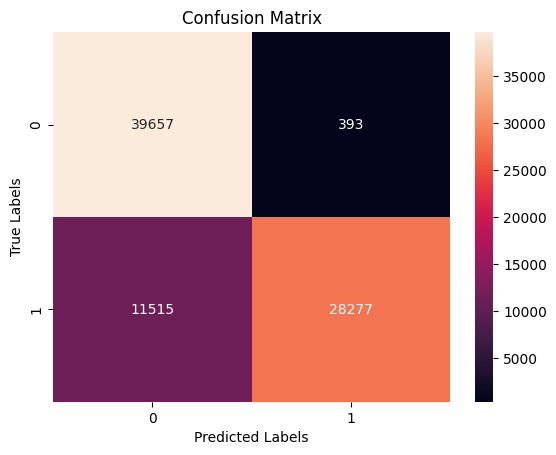

In [ ]:
accuracy = accuracy_score(Y_test, weighted_avg_pred)
print("Weighted Average Model Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, weighted_avg_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(Y_test, weighted_avg_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87     40050
           1       0.99      0.71      0.83     39792

    accuracy                           0.85     79842
   macro avg       0.88      0.85      0.85     79842
weighted avg       0.88      0.85      0.85     79842

